Here we will work with data from a European Bank.

The data will be used to predict whether the customer of a bank will churn. 
Churn refers to when a customer leaves the bank and takes their business elsewhere.
We will attempt to predict which customers are likely to churn so that we can take measures to retain them before they do.

The topic we will be focusing on here is called **Feature engineering**.
Feature engineering is the process of using practical, statistical and data science knowledge to select, transform, and extract characteristics,
properties and attributes from raw data.
The general categories :
1. **Feature selection** : removing unnecessary and uninformative features.
2. **Feature transformation** : modifying existing features to best suit our objective, encoding of categorical features as dummies.
3. **Feature extraction** : taking multiple existing features to create new features.

In [1]:
# import packages and libraries
import numpy as np
import pandas as pd

In [2]:
# read the data
data = pd.read_csv(r"C:\Users\shirs\Downloads\Churn_Modelling.csv")

In [3]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


The dataset has a variable called `Exited`.The column contains boolean values of 0 and 1 that indicates whether a customer has left the bank or not.
0 indicates customer did not leave and 1 indicates customer did leave. We can safely say that this will be our target variable.
This will be a supervised learning classification task because we will predict on a binary class. 
In other words, we want our model to predict whether or not there should be a 0 or 1 in the `Exited` column.

In [4]:
# a high-level overview of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


From this table we can confirm that the data has 14 features and 10,000 observations.9 of these features are of type int64, 3 of object type and
2 of type float64. Finally, we can observe that there are no null values as each feature contains 10,000 non-null values.

**Feature selection** :
Notice that the first column is called `RowNumber`. We can drop this feature as this column should not have any correlation as to whether or not 
a customer churned. 
Columns such as `CustomerId` and `Surname` can also be remove as they cannot be expected to have any predictive potential pertaining to the target
variable.
Lastly, we are going to remove the `Gender` feature for ethical reasons. We don't want our model to make predictions(and hence, offer incentives) 
based on a person's gender.

In [5]:
data.drop(['RowNumber', 'CustomerId', 'Surname', 'Gender'], axis = 1, inplace = True)

In [6]:
data.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1
3,699,France,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0


**Feature extraction** : 
We have a theory that the customers who have done business with the bank for a greater proportion of their lives are less likely to churn.
For this, we will create a `Loyalty` feature. This feature will represent the percentage of a customer's life that they were customers
Loyalty = Tenure / Age

In [7]:
data['Loyalty'] = data['Tenure'] / data['Age'] * 100

In [8]:
data.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyalty
0,619,France,42,2,0.00,1,1,1,101348.88,1,4.761905
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0,2.439024
2,502,France,42,8,159660.80,3,1,0,113931.57,1,19.047619
3,699,France,39,1,0.00,2,0,0,93826.63,0,2.564103
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0,4.651163


**Feature transformation** :
The models we will be building with this dataset are all classification models and classification models generally need categorical variables to be
encoded.
As we can see our data has one categorial feature `Geography`.

In [9]:
# print unique values in Geography
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

There are three unique values, France, Spain and Germany. We will get this data to be represented by Boolean features by encoding it.
We will use the `pd.get_dummies()` function.
Upon using this function, the `Geography` column will be replaced with three new Boolean columns, one for each possible category contained in the
column being dummied.

In [10]:
data = pd.get_dummies(data,drop_first = True).astype(int)

In [11]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyalty,Geography_Germany,Geography_Spain
0,619,42,2,0,1,1,1,101348,1,4,0,0
1,608,41,1,83807,1,0,1,112542,0,2,0,1
2,502,42,8,159660,3,1,0,113931,1,19,0,0
3,699,39,1,0,2,0,0,93826,0,2,0,0
4,850,43,2,125510,1,1,1,79084,0,4,0,1


We can use the dataset as it is for model-making. However, if we specify `drop_first = True` then it will replace the `Geography` feature with two 
columns instead of three. 
This, way no information will be lost and the dataset will be shorter and simpler.
Supposing on doing this, we end up with columns `Geography_Germany` and `Geography_Spain`. For a customer, if both of these columns contain 0, it means that they belong from France.

### NAIVE BAYES MODEL

The objective is to create a Naive Bayes model that predicts whether a customer will churn with the help of banking data.

Our target variable is `Exited`. This is a Boolean value that indicates whether or not a customer will churn or not( 0: not left, 1: left).

We are using Naive Bayes as it works well in classification tasks like this one where we are trying to predict on a binary class.There are several
different types of implementation of Naive Bayes algorithm in scikit-learn, and each assumes that all of the predictor variables are of a single type (ex: Gaussian for continuous variables, Bernoulli for binary variables, Categorical for categorical features and Multinomial for discrete features).

In this case we , to build the best Naive Bayes model, we would have to treat each variable according to their different types and distributions, and then combine each conditional probability to get the final prediction for each observation. However this comes under advanced data science.

For now, we're going to use the `GaussianNB` classifier, assuming that all of our variables are continuous and have a Gaussian(normal) distribution.
A Gaussian model may yield useful results even though our data is imperfect and does not adhere to all of these assumptions.

In [12]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [13]:
data.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyalty,Geography_Germany,Geography_Spain
0,619,42,2,0,1,1,1,101348,1,4,0,0
1,608,41,1,83807,1,0,1,112542,0,2,0,1
2,502,42,8,159660,3,1,0,113931,1,19,0,0
3,699,39,1,0,2,0,0,93826,0,2,0,0
4,850,43,2,125510,1,1,1,79084,0,4,0,1
5,645,44,8,113755,2,1,0,149756,1,18,0,1
6,822,50,7,0,2,1,1,10062,0,14,0,0
7,376,29,4,115046,4,1,0,119346,1,13,1,0
8,501,44,4,142051,2,0,1,74940,0,9,0,0
9,684,27,2,134603,1,1,1,71725,0,7,0,0


In [14]:
# checking class balance
data["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

The class is approximately split 80/20. In other words, roughly 20% of the people churned. The imbalance is not extreme.

Also, Naive Bayes formula depends on class priors(P(c)) to make predictions. Performing class balancing(upsampling or downsampling) to balance the 
class would change those terms in a way that would no longer reflect the real-world distribution of the data.

Therefore, we will not alter the class balance.

**DROP DEPENDENT VARIABLES**

We know that Naive Bayes Model operates best when there's conditional independence between the predictor variables. Earlier, we engineered a feature called 'Loyalty' by dividing `Tenure` by `Age`. Since this new feature is a quotient of two existing features, they are no longer conditionally independent. Therefore, we will drop `Tenure` and `Age` from the dataset. This step may or may not be beneficial but we will do it to adhere to the assumptions of our model

In [15]:
data.drop(['Tenure','Age'], axis=1, inplace = True)

In [16]:
data.head(10)

,CreditScore,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyalty,Geography_Germany,Geography_Spain
0,619,0,1,1,1,101348,1,4,0,0
1,608,83807,1,0,1,112542,0,2,0,1
2,502,159660,3,1,0,113931,1,19,0,0
3,699,0,2,0,0,93826,0,2,0,0
4,850,125510,1,1,1,79084,0,4,0,1
5,645,113755,2,1,0,149756,1,18,0,1
6,822,0,2,1,1,10062,0,14,0,0
7,376,115046,4,1,0,119346,1,13,1,0
8,501,142051,2,0,1,74940,0,9,0,0
9,684,134603,1,1,1,71725,0,7,0,0


**SPLIT THE DATA**
Before we begin modelling, we must split the data into features and target variables and into training data and test data.
To do this, we will use the train_test_split() function. 25% will be used as test data and the remaining 75% will be used to train the model.

In [17]:
# target variable : y
y = data["Exited"]

# predictor variable : X
X= data.copy()
X= X.drop('Exited', axis =1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state =42)

The argument stratify is necessary to ensure the proportion of 80/20 split is maintained in both the training and test data. `=y` tells the function that it should use the class ratio found in the y variable. 
If we didn't stratify the data then the function would split it randomly resulting in an unhelpful split that doesn't get any of the minority class in the test data. In that case, we will be unable to evaluate our data properly. 

## MODELING 

In [18]:
# fit the model to the training data
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# use the model to make predictions on the test data
y_preds = gnb.predict(X_test)

In [19]:
# check model performance
print('Accuracy:', '%.3f' % accuracy_score(y_test, y_preds))
print('Precision:', '%.3f' % precision_score(y_test, y_preds))
print('Recall:', '%.3f' % recall_score(y_test, y_preds))
print('F1 Score:', '%.3f' % f1_score(y_test, y_preds))

Accuracy: 0.796
Precision: 0.000
Recall: 0.000
F1 Score: 0.000


C:\Users\shirs\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


According to the warning, we can conclude that the denominator in the precision formula is 0. This means that our model did not predict any positives at all (since precision = true positives / (false positives + true positives). Therefore, we know that our model is not predicting any churned customers.

In case no warning was generated, we have to assume that the numerator might have been 0, which would mean that the model did not predict any true positives. To check which situation is occurring, we will call the `np.unique()` on the model's predictions and it should return an array containing 0 and 1. 

In [20]:
# check unique values in predictions
np.unique(y_preds)

array([0])

It returns only 0 which drives us to the same conclusion as before. The model is not predicting any churned customers.

This confirms that the model predicted 0, i.e. not churned for every sample in the test data

Reasons why this might be : 
1. We did something wrong in the modeling process

2. Using GaussianNB on predictor variables of different types and distributions just doesn't make a good model

3. There were problems with the data

Let's take another look at the data. It might be helpful in understanding what's going on or what steps we could further take.

In [21]:
X.describe()

,CreditScore,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Loyalty,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,76485.571500,1.530200,0.70550,0.515100,100089.748400,13.365200,0.250900,0.247700
std,96.653299,62397.185107,0.581654,0.45584,0.499797,57510.491042,8.958608,0.433553,0.431698
min,350.000000,0.000000,1.000000,0.00000,0.000000,11.000000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,1.000000,0.00000,0.000000,51001.750000,6.000000,0.000000,0.000000
50%,652.000000,97198.000000,1.000000,1.00000,1.000000,100193.500000,12.000000,0.000000,0.000000
75%,718.000000,127643.750000,2.000000,1.00000,1.000000,149387.750000,20.000000,1.000000,0.000000
max,850.000000,250898.000000,4.000000,1.00000,1.000000,199992.000000,55.000000,1.000000,1.000000


**Standouts** :
The `Loyalty` variable is on a vastly difference scale than some of the other variables like `Balance` or `EstimatedSalary`. The maximum value for `Balance` is over 250,000 while for `Loyalty` is only 55. That is a huge difference.

## Scaling the data

There is a way we can still work on this problem, by scaling our predictor variables. Some models require to scale the data for them to operate as expected, while others don't.
Naive Bayes does not require data scaling. However, sometimes packages and libraries need to make assumptions and approximations in their calculations. 
We're already breaking some of these assumptions by using the `GaussianNB` classifier on this dataset and it may not be helping that some of our predictor variables are on very different scales.
In general, scaling won't improve the model but it probably won't make it worse. 

We will use a function called `MinMaxScaler` from the `sklearn.preprocessing` module. It normalizes each column so each value falls in the range of [0,1]. 
The formula is :
$${x_{scaled}} = \frac{x- x_{min}}{x_{max} - x_{min}}$$

We will fit it to the training model and transform both the training and the test data using the same scaler.

In [22]:
# import the scaler function
from sklearn.preprocessing import MinMaxScaler

# Instantiate the scaler
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
# fit the model to the scaled data
gnb_scaled = GaussianNB()
gnb_scaled.fit(X_train, y_train)

# get predictions on test data
scaled_preds = gnb_scaled.predict(X_test)

In [24]:
# check model performance on scaled data
print('Accuracy :', '%.3f' % accuracy_score(y_test, scaled_preds))
print('Precision :', '%.3f' % precision_score(y_test, scaled_preds))
print('Recall :', '%.3f' % recall_score(y_test, scaled_preds))
print('F1 Score :', '%.3f' % f1_score(y_test, scaled_preds))

Accuracy : 0.806
Precision : 0.543
Recall : 0.301
F1 Score : 0.387


This model works much better. It's far from perfect but at least the model is predicting churned customers now.

## Evaluation

Now, we will use a confusion matrix to examine more closely how our model classified the test data. 

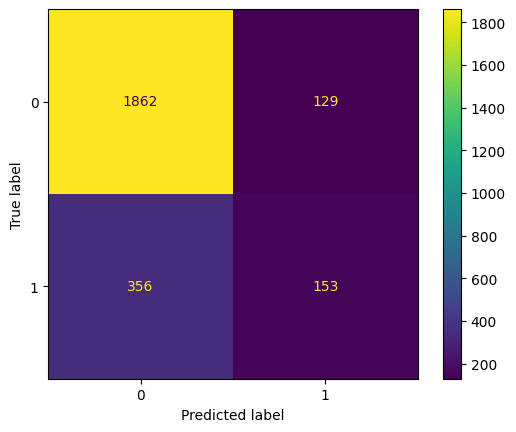

In [26]:
cm = confusion_matrix(y_test, scaled_preds, labels = gnb_scaled.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = gnb_scaled.classes_)
disp.plot()

What stands out most in the confusion matrix is that the model misses a lot of the customers likely to churn. The false negatives is quite high - 356 to be exact. Owing to which, the recall score is only 0.301.

By evaluating the results of the model we can conclude that there's scope for considerable improvement. We would certainly want to make other models to see if they perform better for our particular scenario.
For the time being, this project proved to be a good initial practice of implementing a Naive Bayes model.